# Prophet

Prophet is an open-source forecasting tool developed by Facebook, designed to handle time series data with daily or seasonal patterns. It is particularly useful for forecasting with missing data, outliers, and holiday effects. Prophet is easy to use and can be applied to a wide range of forecasting problems, such as sales, stock prices, and web traffic.

I decided to also work with Prophet since this was one of the recommended models I found while looking up information related to predicting stock prices.

One of the major benefits from using Prophet besides it being more accurate than the models from PyCaret is that it also automatically handles missing values in the data, streamlining the pre-processing process.

In [25]:
#%pip install prophet

In [26]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [27]:
# Load and prepare your data (ensure you have 'Date' and 'Close' columns)
csv_filename = 'Data/SP500_last_decade.csv'
df = pd.read_csv(csv_filename)

# Prepare data for Prophet: Prophet requires a dataframe with columns 'ds' (date) and 'y' (value)
df['Date'] = pd.to_datetime(df['Date'])  # Ensure dates are in datetime format
df = df[['Date','close']]
df = df.rename(columns={'Date': 'ds', 'close': 'y'})
df


,ds,y
0,2014-11-26,2072.830078
1,2014-11-28,2067.560059
2,2014-12-01,2053.439941
3,2014-12-02,2066.550049
4,2014-12-03,2074.330078
...,...,...
2510,2024-11-18,5893.620117
2511,2024-11-19,5916.979980
2512,2024-11-20,5917.109863
2513,2024-11-21,5948.709961


In [28]:
# Initialize and fit the Prophet model
model = Prophet()
model.fit(df)
# Make a DataFrame for future dates
future = model.make_future_dataframe(periods=300)  # 'periods' specifies the number of steps to predict
# Predict future values
forecast = model.predict(future)

# Display forecasted values for the specified future period
forecasted_values = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)  # Last 10 predictions
print("Forecasted Values:")
print(forecasted_values)

12:17:34 - cmdstanpy - INFO - Chain [1] start processing
12:17:36 - cmdstanpy - INFO - Chain [1] done processing


Forecasted Values:
             ds         yhat   yhat_lower   yhat_upper
2805 2025-09-09  6614.172680  6248.162040  6978.204098
2806 2025-09-10  6611.946906  6260.668050  6978.225181
2807 2025-09-11  6610.629834  6245.605523  6981.275822
2808 2025-09-12  6609.539034  6249.746107  6975.046840
2809 2025-09-13  6600.296503  6226.713122  6983.781726
2810 2025-09-14  6598.775790  6199.206772  6960.267002
2811 2025-09-15  6604.484152  6246.184749  6982.839094
2812 2025-09-16  6603.841676  6234.280026  6975.868359
2813 2025-09-17  6601.873830  6238.638816  6986.514281
2814 2025-09-18  6601.092460  6219.634562  6985.100132


In [29]:
# Create the main line for historical data
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df['ds'], 
    y=df['y'], 
    mode='lines', 
    name='Historical Data',
    line=dict(width=1.5)
))

# Create the main line for forecast data
fig.add_trace(go.Scatter(
    x=forecast['ds'], 
    y=forecast['yhat'], 
    mode='lines', 
    name='Forecast',
    line=dict(color='orange', width=2)
))

# Add a shaded area for forecast bounds
fig.add_trace(go.Scatter(
    x=forecast['ds'].tolist() + forecast['ds'][::-1].tolist(),
    y=forecast['yhat_upper'].tolist() + forecast['yhat_lower'][::-1].tolist(),
    fill='toself',
    fillcolor='rgba(255,165,0,0.3)',  # Light orange fill
    line=dict(color='rgba(255,255,255,0)'),  # No border
    name='Forecast Bounds'
))

# Update layout
fig.update_layout(
    title='SP500 Forecast using Prophet',
    xaxis_title='Date',
    yaxis_title='Stock Price',
    legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01),
    template='plotly_white',
    autosize=True
)

# Show the plot
fig.show()


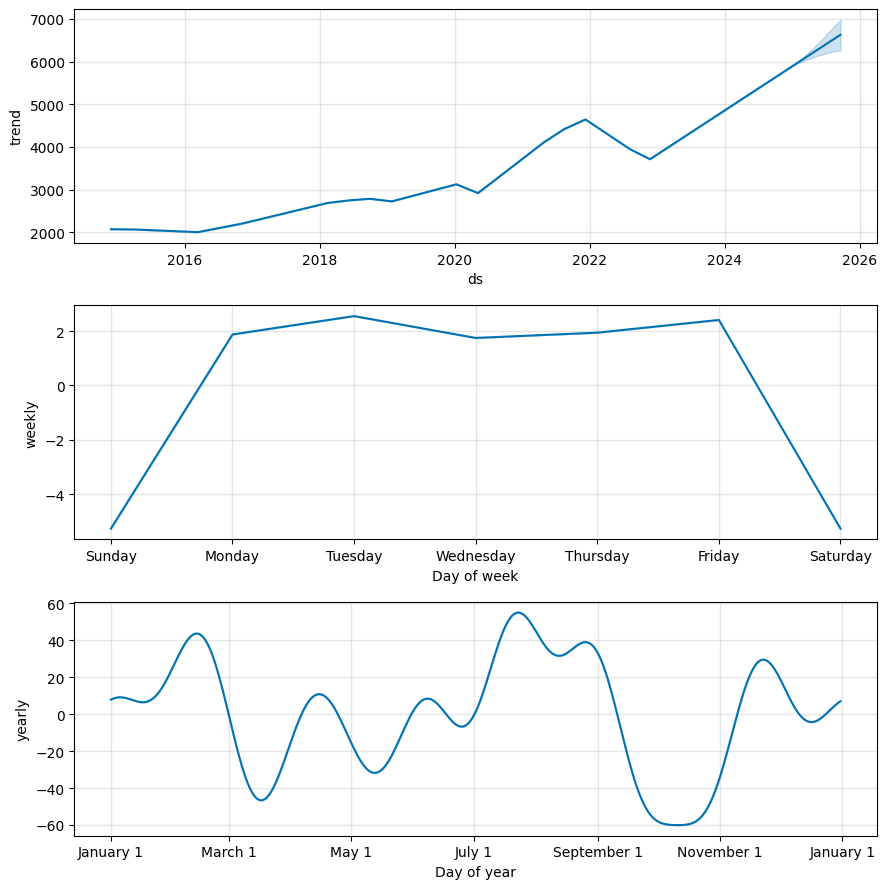

In [30]:
model.plot_components(forecast)
plt.show()